In [30]:
import numpy as np
from scipy.special import expi
dx=.1
x=np.arange(0,10,dx)


sigma=1.16508*np.ones_like(x)


gradx=np.gradient(x)


def tau(i,j):

    s=0
    if i<j:

        s=sigma[i]*gradx[i]+sigma[j]*(gradx[j])
        k=i+1
        while k<j-1:
            s=s+gradx[k]*sigma[k]
            k=k+1
    elif i>j:
        s=sigma[j]*gradx[j]+sigma[i]*gradx[i]

        k=j+1
        while k<i-1:
            s=s+gradx[k]*sigma[k]
            k=k+1

    elif i==j:

            s=sigma[i]*(gradx[i])

    return s 

  
def E(x):
    dx=0.001
    meu=np.arange(0.0001,1,dx)
    f=meu*np.exp(-x/meu)
    val=np.trapz(f,meu,dx=dx)
    #val=np.exp(-x)/3 - x*np.exp(-x)/6 +x**2*np.exp(-x)/6 +x**3*expi(-x)
    return val
matrix=np.zeros((len(x),len(x)))

for i in range(len(x)):
    val=0
    
    for j in range(len(x)):
        if i!=j:
            val=(E(tau(i,j))-E((tau(i,j)+tau(i,i)))-E((tau(i,j)+tau(j,j)))+E((tau(i,j)+tau(i,i)+tau(j,j))))/(2*sigma[i]*gradx[i])
            

        if i==j:

            val=(sigma[i]*gradx[i])*((1-(1-2*E(tau(i,i))))/(2*sigma[i]*gradx[i]))

        matrix[i][j]=val

sum(matrix)

array([0.68956711, 0.73637784, 0.78318856, 0.81857661, 0.84614232,
       0.86804371, 0.88569368, 0.90007158, 0.91188393, 0.92165561,
       0.92978551, 0.93658223, 0.94228796, 0.94709507, 0.95115785,
       0.95460114, 0.95752666, 0.9600178 , 0.96214332, 0.9639602 ,
       0.96551582, 0.96684976, 0.9679952 , 0.96898002, 0.96982772,
       0.97055817, 0.97118818, 0.97173204, 0.97220188, 0.97260805,
       0.97295937, 0.97326337, 0.97352649, 0.97375426, 0.9739514 ,
       0.97412196, 0.9742694 , 0.97439671, 0.97450643, 0.97460074,
       0.9746815 , 0.97475029, 0.97480846, 0.97485713, 0.97489723,
       0.97492955, 0.97495469, 0.97497314, 0.97498525, 0.97499125,
       0.97499125, 0.97498525, 0.97497314, 0.97495469, 0.97492955,
       0.97489723, 0.97485713, 0.97480846, 0.97475029, 0.9746815 ,
       0.97460074, 0.97450643, 0.97439671, 0.9742694 , 0.97412196,
       0.9739514 , 0.97375426, 0.97352649, 0.97326337, 0.97295937,
       0.97260805, 0.97220188, 0.97173204, 0.97118818, 0.97055

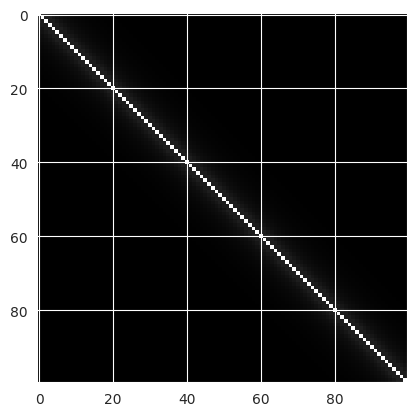

In [31]:

import matplotlib.pyplot as plt

plt.imshow(matrix,cmap='gray')


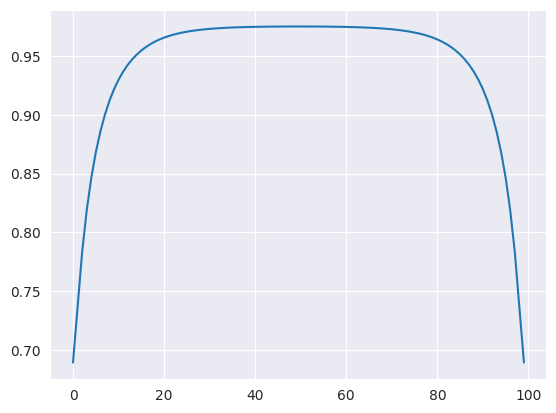

In [32]:

plt.plot(sum(matrix))